In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [35]:
neighbors = read.table("109327480479767108490.feat",colClasses = "character")
edges = read.table("109327480479767108490.edges", colClasses = "character")

In [39]:
edge_list = as.vector(t(edges))

In [37]:
temp = neighbors[1]
neighbors[1] = "109327480479767108490"
neighbors[2] = temp
neighbors

V1,V2
109327480479767108490,118147007938576396015
109327480479767108490,104494778253828680610
109327480479767108490,100503825046812729376
109327480479767108490,115521561098057798664
109327480479767108490,116899029375914044550
109327480479767108490,113602333794408549636
109327480479767108490,104325067584851948777
109327480479767108490,113451486957785313038
109327480479767108490,112533132246191062650
109327480479767108490,111305112921461121561


In [40]:
g <- graph_from_data_frame(neighbors, directed = TRUE, vertices = NULL)

IGRAPH 75181e8 DN-- 774 10884 -- 
+ attr: name (v/c)
+ edges from 75181e8 (vertex names):
 [1] 109327480479767108490->118147007938576396015
 [2] 109327480479767108490->104494778253828680610
 [3] 109327480479767108490->100503825046812729376
 [4] 109327480479767108490->115521561098057798664
 [5] 109327480479767108490->116899029375914044550
 [6] 109327480479767108490->113602333794408549636
 [7] 109327480479767108490->104325067584851948777
 [8] 109327480479767108490->113451486957785313038
+ ... omitted several edges

In [46]:
g <- add_edges(g, edge_list)

In [49]:
vcount(g)

[1] 774

[1] 0.2527654


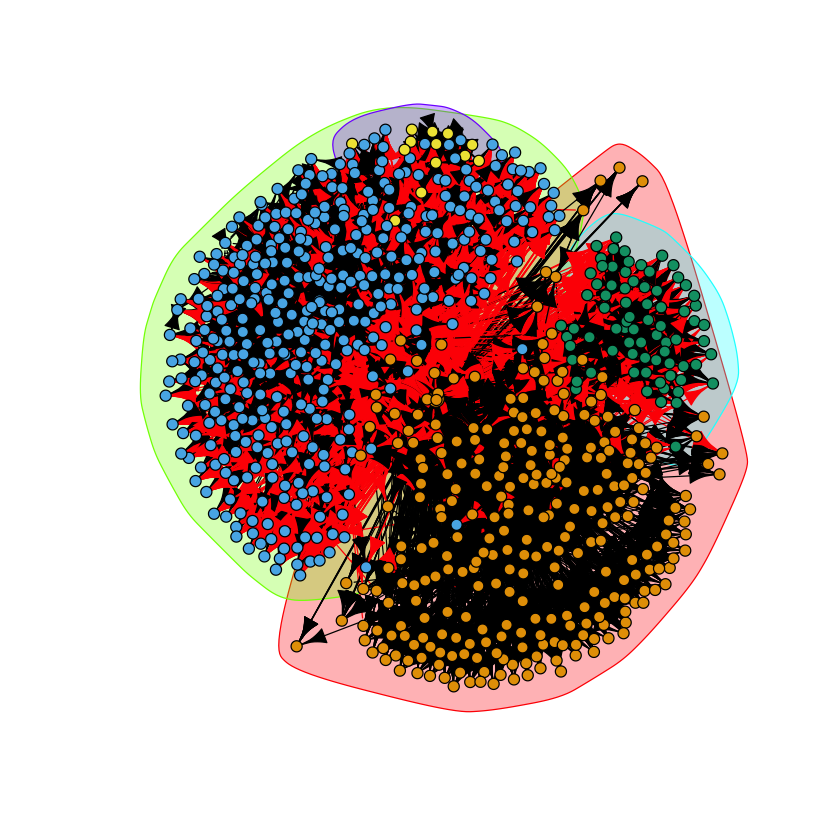

In [48]:
walktrap <- walktrap.community(g)
color_vector = walktrap$membership+1
vertex_vector = rep(4,vcount(g))
vertex_vector[1]=6
print(modularity(walktrap))
plot(walktrap,g,vertex.color=color_vector,vertex.label=NA,vertex.size=vertex_vector)